In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\cluster_data.csv")
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
2295,-229.000000,-504.000000
2296,392.000000,-580.000000
2297,134.000000,525.000000
2298,469.000000,-535.000000


In [3]:
df.shape

(2300, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2300 non-null   float64
 1   1       2300 non-null   float64
dtypes: float64(2)
memory usage: 36.1 KB


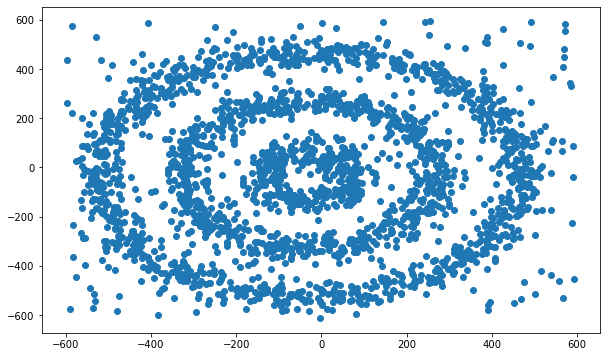

In [5]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df["0"],df["1"])

## KMeans

In [6]:
x=df

In [7]:
k=[1,2,3,4,5,6,7,8,9,10]

In [8]:
from sklearn.cluster import KMeans
color=["g","b","y","g","o"]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

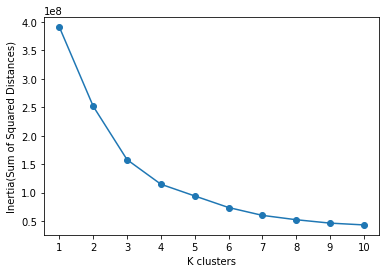

In [9]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

In [10]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(n_clusters=6)

In [11]:
model.labels_

array([4, 4, 4, ..., 0, 3, 0])

In [12]:
model.cluster_centers_

array([[ -44.27682743,  368.3177367 ],
       [ -28.95608327,  -33.89221374],
       [-279.610818  , -341.16692685],
       [ 230.97003153, -327.49458556],
       [ 346.05827266,  152.4225413 ],
       [-397.17492711,  127.38922224]])

In [13]:
model.n_iter_

8

In [14]:
data=df
data["Customer Group"]=model.labels_

In [15]:
data

,0,1,Customer Group
0,484.891555,-31.006357,4
1,489.391178,21.973916,4
2,462.886575,-27.599889,4
3,517.218479,5.588090,4
4,455.669049,1.982181,4
...,...,...,...
2295,-229.000000,-504.000000,2
2296,392.000000,-580.000000,3
2297,134.000000,525.000000,0
2298,469.000000,-535.000000,3


In [16]:
df.columns

Index(['0', '1', 'Customer Group'], dtype='object')

In [17]:
group_labels=model.labels_
centeroid=model.cluster_centers_
centeroid

array([[ -44.27682743,  368.3177367 ],
       [ -28.95608327,  -33.89221374],
       [-279.610818  , -341.16692685],
       [ 230.97003153, -327.49458556],
       [ 346.05827266,  152.4225413 ],
       [-397.17492711,  127.38922224]])

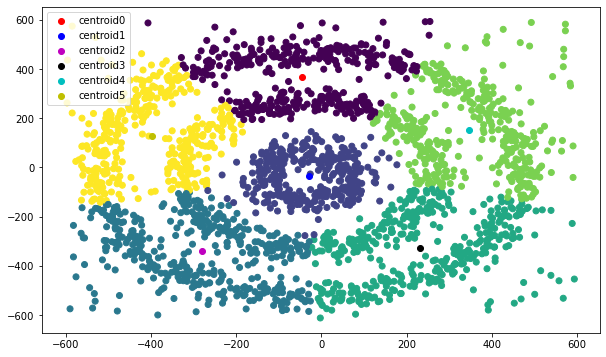

In [18]:
#plotting the clusters
fig=plt.figure(figsize=(10,6))
plt.scatter(df['0'],df['1'],c=group_labels)
color=["r","b","m","k","c","y"]
for i in range(centeroid.shape[0]):
    plt.scatter(centeroid[i][0],centeroid[i][1],color=color[i], label=str("centroid"+str(i)))
plt.legend()

## Hierarchy Agglomerative clustering

In [19]:
x=df

In [20]:
import scipy.cluster.hierarchy as shc

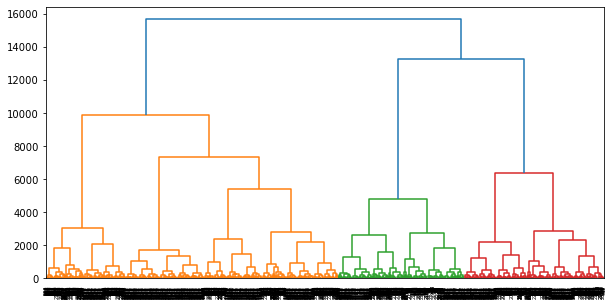

In [21]:
plt.figure(figsize=(10,5))
#from scipy.cluster import heirarchy 
den=shc.dendrogram(shc.linkage(x,method="ward"))

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
model=AgglomerativeClustering(n_clusters=4)
model.fit(x)

AgglomerativeClustering(n_clusters=4)

In [24]:
model.labels_

array([1, 2, 1, ..., 2, 1, 2], dtype=int64)

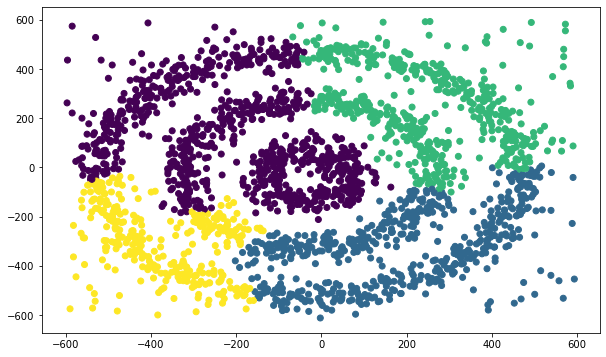

In [25]:
fig=plt.figure(figsize=(10,6))
plt.scatter(x['0'],x['1'],c=model.labels_)

## DBSCAN Clustering

In [26]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

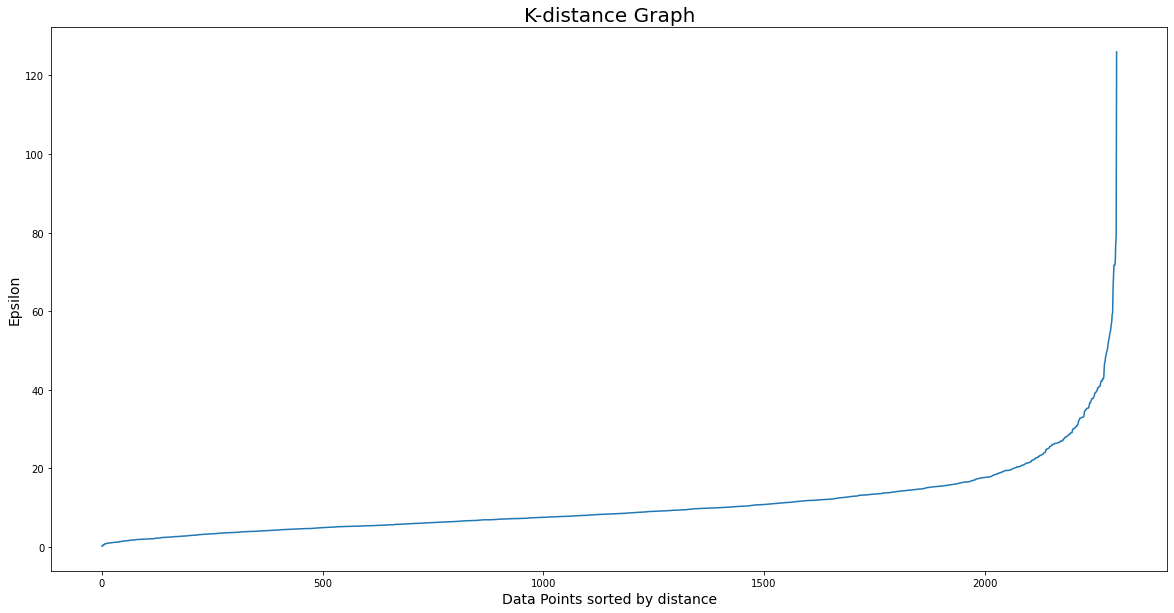

In [27]:
plt.figure(figsize=(20,10))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [28]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=30,min_samples=4)
model.fit(df)

DBSCAN(eps=30, min_samples=4)

Text(0, 0.5, 'Feature 2')

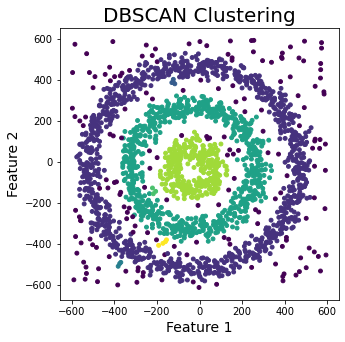

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(df["0"],df["1"],c=model.labels_,s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)